In [1]:
import numpy as np
from keras import callbacks

import capsulenet

Using TensorFlow backend.
/home/watiz/.virtualenvs/siamese_reid/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Args

In [2]:
class args:
    save_dir = "weights/"
    debug = True
    
    # model
    routings = 1
    
    # hp
    batch_size = 32
    lr = 0.001
    lr_decay = 1.0
    lam_recon = 0.392
    
    # training
    epochs = 3
    shift_fraction = 0.1
    digit = 5

## Load data

In [3]:
(x_train, y_train), (x_test, y_test) = capsulenet.load_mnist()

## Define model

In [4]:
model, eval_model, manipulate_model = capsulenet.CapsNet(input_shape=x_train.shape[1:],
                                                  n_class=len(np.unique(np.argmax(y_train, 1))),
                                                  routings=args.routings)

## Training

INFO:tensorflow:Summary name conv1/kernel:0 is illegal; using conv1/kernel_0 instead.
INFO:tensorflow:Summary name conv1/bias:0 is illegal; using conv1/bias_0 instead.
INFO:tensorflow:Summary name primarycap_conv2d/kernel:0 is illegal; using primarycap_conv2d/kernel_0 instead.
INFO:tensorflow:Summary name primarycap_conv2d/bias:0 is illegal; using primarycap_conv2d/bias_0 instead.
INFO:tensorflow:Summary name digitcaps/W:0 is illegal; using digitcaps/W_0 instead.
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.
INFO:tensorflow:Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.
INFO:tensorflow:Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.
INFO:tensorflow:Summary name dense_3/kernel:0 is illegal; using dense_3/kernel_0 instead.
INFO:tensorflow:Summary name dense_3/bias:0 is illegal; using dense_3/bias_0 instead.
Epoc

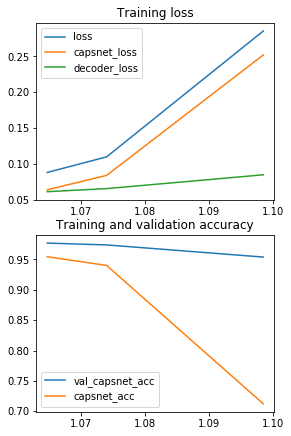

In [5]:
capsulenet.train(model=model, data=((x_train, y_train), (x_test, y_test)), args=args)

------------------------------Begin: test------------------------------
Test acc: 0.9784

Reconstructed images are saved to weights//real_and_recon.png
------------------------------End: test------------------------------


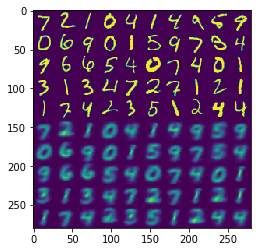

In [6]:
capsulenet.test(eval_model, data=(x_test, y_test), args=args)